In [272]:
import os
import pandas as pd
from fastbook import *
from fastai.tabular.all import *
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from dtreeviz.trees import *
import sklearn


def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

traindf = pd.read_csv('/mnt/c/Users/jsult/Desktop/spacetitanic3/train.csv',low_memory=False)
testdf = pd.read_csv('/mnt/c/Users/jsult/Desktop/spacetitanic3/test.csv',low_memory= False)
traindf.dropna(inplace = True)


In [273]:
def split_cabin(df):
    df['CabinDeck'] = df['Cabin'].apply(lambda x: x.split("/" )[0] if pd.notna(x) else pd.NA)
    df['CabinSide'] = df['Cabin'].apply(lambda x: x.split("/")[2] if pd.notna(x) else pd.NA)
    df['CabinNum'] = df['Cabin'].apply(lambda x: int(x.split("/")[1]) if pd.notna(x) else pd.NA)

    df.drop(columns = ['Cabin'],inplace = True)
    return df
traindf = split_cabin(traindf)
testdf= split_cabin(testdf)

In [274]:
def total_spending(df):
    df['TotalSpending'] = df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck'] + df['RoomService']
    return df
traindf = total_spending(traindf)

In [235]:
def total_spending_without_roomservice(df):
    df['TotalSpendingwo'] = df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']
    return df
traindf = total_spending_without_roomservice(traindf)

In [110]:
traindf.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'TotalSpending', 'TotalSpendingwo'],
      dtype='object')

In [111]:
(np.array(traindf[(traindf.Age > 12) &(traindf.Age <17)].Spa) > 0).sum() / len(np.array(traindf[(traindf.Age > 12) &(traindf.Age <17)]))

0.2713004484304933

In [112]:
(np.array(traindf[(traindf.Age <14)].TotalSpendingwo) > 0).sum() / len(np.array(traindf[(traindf.Age <14)]))

0.07608695652173914

In [113]:
import pandas as pd

def calculate_proportion(df):
    # Select rows with age greater than 12 and under 18
    selected_rows = df[(df['Age'] > 12) & (df['Age'] < 18)]

    # Calculate the total number of selected rows
    total_selected_rows = len(selected_rows)

    # Define the 5 categories
    categories = ['VRDeck', 'Spa', 'RoomService', 'FoodCourt', 'ShoppingMall']

    # Initialize a counter for valid entries
    valid_count = 0

    # Iterate through selected rows
    for _, row in selected_rows.iterrows():
        zero_count = 0

        # Check each of the 5 categories
        for category in categories:
            if row[category] == 0:
                zero_count += 1

        # Check if 3 or more categories are zero
        if zero_count >= 2:
            valid_count += 1

    # Calculate the proportion
    proportion = valid_count / total_selected_rows

    return proportion

# Assuming traindf is your DataFrame containing the data
proportion = calculate_proportion(traindf)
print(f"Proportion of valid entries: {proportion:.2%}")


Proportion of valid entries: 86.48%


In [114]:
(traindf.TotalSpending == 0).sum()

2736

In [115]:
((traindf[categories] == 0).sum(axis = 1) ==5 ).sum()

0

In [117]:
(traindf[categories] == 0).sum(axis=1)

0       4
1       0
2       1
3       0
4       0
       ..
8688    1
8689    4
8690    2
8691    1
8692    2
Length: 6606, dtype: int64

In [157]:
(traindf[(traindf.HomePlanet == 'Earth') & (traindf.CryoSleep == False) & (traindf.CabinDeck == 'E')].TotalSpending > 0).sum() / len(traindf[(traindf.CabinDeck == 'E') & (traindf.HomePlanet == 'Earth') & (traindf.CryoSleep == False)])

0.9735973597359736

In [180]:
traindf[(traindf.HomePlanet == 'Europa') & (traindf.CabinDeck == 'E')].CryoSleep.value_counts()

CryoSleep
False    56
True     46
Name: count, dtype: int64

In [149]:
(traindf[(traindf.HomePlanet == 'Mars') & (traindf.CryoSleep == False) & (traindf.CabinDeck == 'D')].TotalSpending > 0)

37      True
69      True
99      True
120     True
124     True
        ... 
8426    True
8447    True
8452    True
8479    True
8590    True
Name: TotalSpending, Length: 203, dtype: bool

In [139]:
traindf.CabinDeck.value_counts()

CabinDeck
F    2152
G    1973
E     683
B     628
C     587
D     374
A     207
T       2
Name: count, dtype: int64

In [120]:
# Create a new column counting the number of zeros in the selected categories
categories = ['VRDeck', 'Spa', 'FoodCourt', 'ShoppingMall','RoomService']
traindf['ZeroCount'] = (traindf[categories] == 0).sum(axis=1)

# Count the total entries with at least 2 zeros
total_entries_with_at_least_2_zeros = (traindf['ZeroCount'] >= 4).sum()

# Count how many of these have all 5 values equal to 0
entries_with_all_5_zeros = ((traindf['ZeroCount'] >= 4) & (traindf[categories].sum(axis=1) == 0)).sum()

# Calculate the proportion
proportion_with_all_5_zeros = entries_with_all_5_zeros / total_entries_with_at_least_2_zeros

print(f"Proportion of entries with at least 2 zeros that have all 5 values equal to 0: {proportion_with_all_5_zeros:.2%}")


Proportion of entries with at least 2 zeros that have all 5 values equal to 0: 93.70%


In [183]:
traindf.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name',
       'Transported', 'TotalSpending', 'TotalSpendingwo', 'ZeroCount',
       'CabinDeck', 'CabinSide', 'CabinNum'],
      dtype='object')

In [206]:
(traindf[(traindf.CryoSleep == False)].FoodCourt > 0)

0       False
1        True
2        True
3        True
4        True
        ...  
8686     True
8688     True
8690    False
8691     True
8692     True
Name: FoodCourt, Length: 4274, dtype: bool

In [208]:
(traindf[(traindf.CryoSleep == False) & (traindf.HomePlanet == 'Europa')].FoodCourt > 0).sum()

871

In [198]:
raindf = traindf.drop(columns = ['PassengerId','CabinNum','Name','TotalSpending','TotalSpendingwo','ZeroCount'])
raindf = pd.get_dummies(raindf)
df_all_corr = raindf.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_all_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_all_corr[df_all_corr['Feature 1'] == 'FoodCourt']

,Feature 1,Feature 2,Correlation Coefficient
17,FoodCourt,FoodCourt,1.000000
57,FoodCourt,HomePlanet_Europa,0.374625
89,FoodCourt,CabinDeck_C,0.252283
116,FoodCourt,HomePlanet_Earth,0.220969
122,FoodCourt,VRDeck,0.216997
124,FoodCourt,Spa,0.215995
129,FoodCourt,CryoSleep_False,0.210782
132,FoodCourt,CryoSleep_True,0.210782
160,FoodCourt,CabinDeck_B,0.172099
187,FoodCourt,CabinDeck_G,0.155623


In [275]:

homeplans = traindf.HomePlanet.copy()

In [ ]:
traindf.drop(columns = 'Transported')

In [231]:
traindf

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,CabinDeck,CabinSide,CabinNum,TotalSpending
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,P,0,0.0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,S,0,736.0
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,S,0,10383.0
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,S,0,5176.0
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,S,1,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,P,98,8536.0
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,S,1499,0.0
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,S,1500,1873.0
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,S,608,4637.0


In [243]:
xs.CryoSleep.value_counts()

CryoSleep
1    3454
2    1831
Name: count, dtype: int64

In [276]:
traindf

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,CabinDeck,CabinSide,CabinNum,TotalSpending
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,P,0,0.0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,S,0,736.0
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,S,0,10383.0
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,S,0,5176.0
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,S,1,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,P,98,8536.0
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,S,1499,0.0
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,S,1500,1873.0
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,S,608,4637.0


In [289]:
list(traindf.HomePlanet.unique())

['Europa', 'Earth', 'Mars']

In [294]:
traindf.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name',
       'Transported', 'CabinDeck', 'CabinSide', 'CabinNum', 'TotalSpending'],
      dtype='object')

In [298]:
traindf.CabinDeck.astype('category')

0       B
1       F
2       A
3       A
4       F
       ..
8688    A
8689    G
8690    G
8691    E
8692    E
Name: CabinDeck, Length: 6606, dtype: category
Categories (8, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']

In [357]:
(traindf.CryoSleep == True).sum()

2332

In [355]:
traindf[(traindf.TotalSpending == 0 ) & (traindf.CryoSleep == True)].TotalSpending.value_counts()

TotalSpending
0.0    2332
Name: count, dtype: int64

In [344]:
a = list(set(traindf.index).difference(set(traindf[(traindf.TotalSpending == 0 ) & (traindf.CryoSleep == True)].index)))

In [347]:
b = traindf.loc[a].copy()

In [352]:
b[b['CryoSleep'] == False]

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,CabinDeck,CabinSide,CabinNum,TotalSpending
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,P,0,0.0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,S,0,736.0
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,S,0,10383.0
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,S,0,5176.0
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,S,1,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,8751_01,Earth,False,TRAPPIST-1e,24.0,False,0.0,0.0,124.0,4.0,471.0,Byront Weavesend,False,F,S,1694,599.0
8186,8752_01,Mars,False,TRAPPIST-1e,35.0,False,2758.0,0.0,1.0,0.0,0.0,Koops Strad,False,D,P,272,2759.0
8187,8753_01,Earth,False,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,545.0,89.0,Lynnee Sellentry,False,F,P,1805,634.0
8188,8753_02,Earth,False,TRAPPIST-1e,38.0,False,22.0,9.0,40.0,732.0,0.0,Garyan Sellentry,False,F,P,1805,803.0


In [382]:
traindf[traindf.CryoSleep == True].ShoppingMall.value_counts()

ShoppingMall
0.0    2332
Name: count, dtype: int64

In [396]:
traindf[traindf.Spa == 0].CryoSleep.value_counts()

CryoSleep
True     2332
False    1777
Name: count, dtype: int64

/home/jakeunix/miniforge3/envs/sptitanic/lib/python3.11/site-packages/fastai/data/transforms.py:225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/jakeunix/miniforge3/envs/sptitanic/lib/python3.11/site-packages/fastai/tabular/core.py:233: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/jakeunix/miniforge3/envs/sptitanic/lib/python3.11/site-packages/fastai/tabular/core.py:233: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/jakeunix/miniforge3/envs/sptitanic/lib/python3.11/site-packages/fastai/tabular/core.py:233: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/jakeunix/miniforge3/envs/sptitanic/lib/pyth

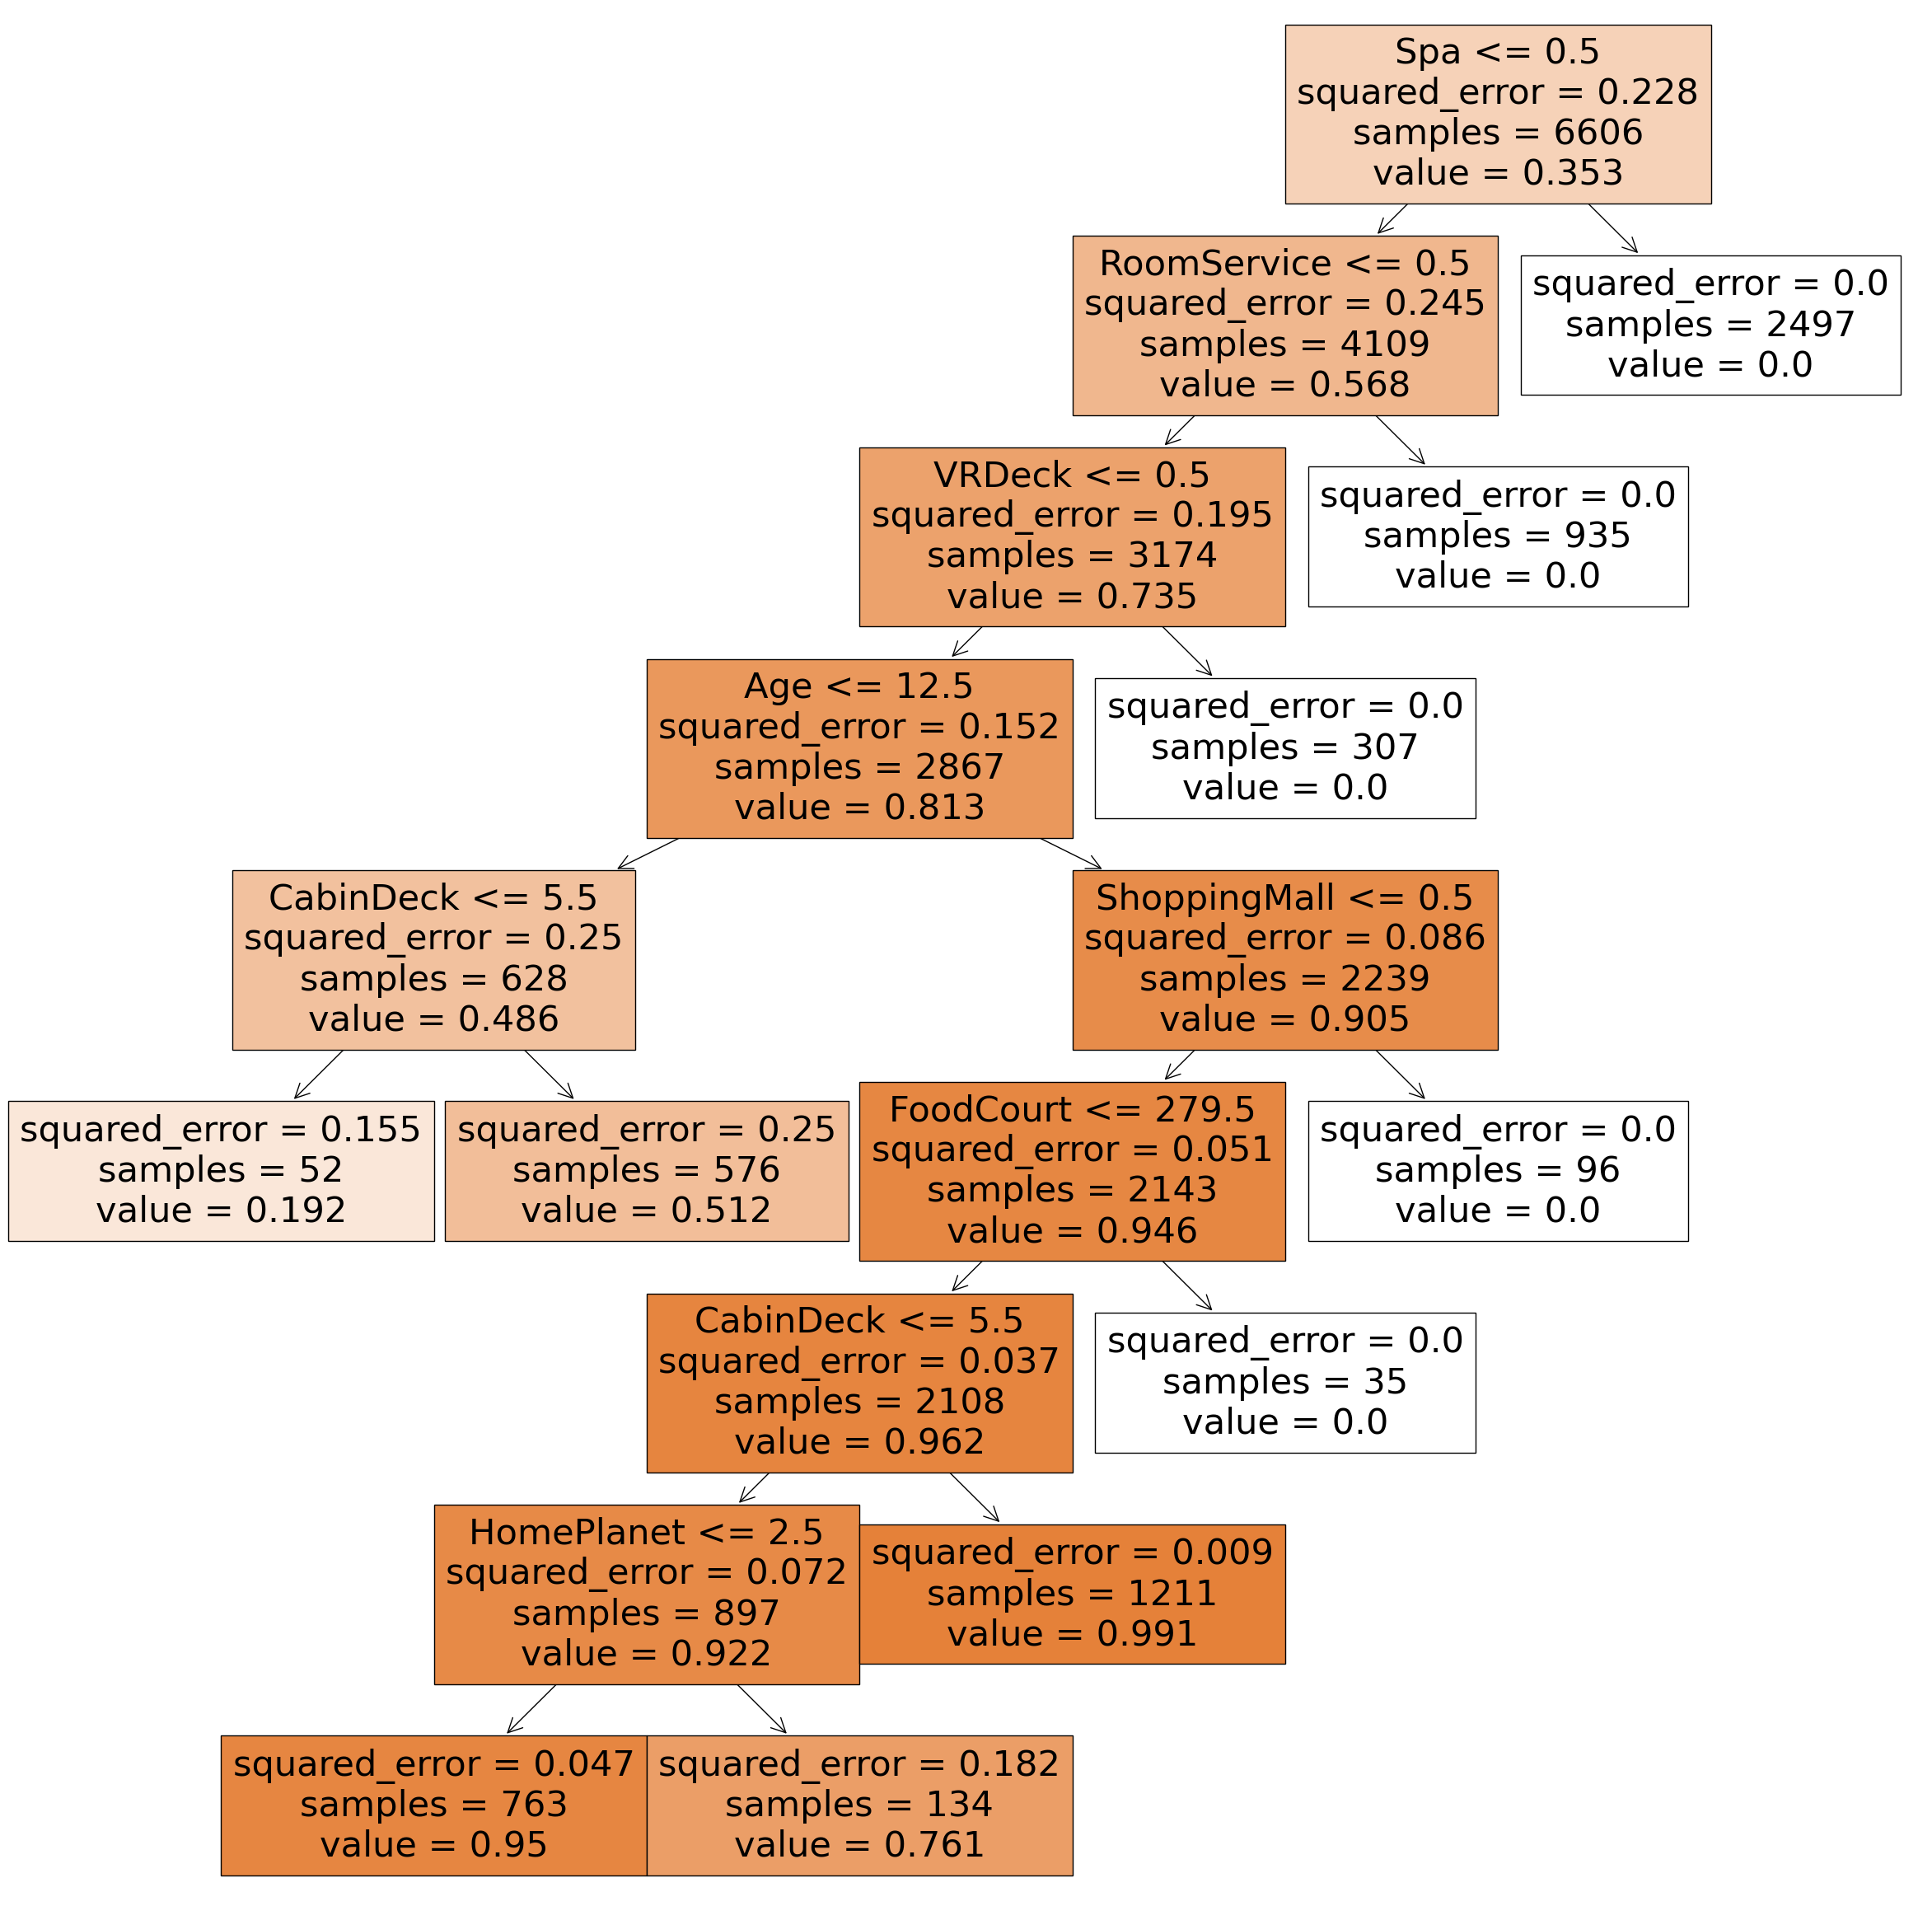

In [397]:
splits = RandomSplitter(seed = 1)(range_of(traindf))
dep_var = 'CryoSleep'
procs = [Categorify]

cat = ['Destination', 'VIP',
       'CabinDeck', 'CabinSide','HomePlanet']
cont = ['Age','RoomService', 'ShoppingMall', 'Spa', 'VRDeck','CabinNum','FoodCourt']

to = TabularPandas(traindf, procs, cat, cont, y_names=dep_var)

xs,y = to.train.xs,to.train.y
valid_xs, valid_y = to.valid.xs, to.valid.y

m = DecisionTreeRegressor(max_leaf_nodes=10)
m.fit(xs, y)

fig = plt.figure(figsize=(30,30))
_ = tree.plot_tree(m,
                   feature_names= xs.columns,
                   filled=True)

#print('decision tree prediction',((m.predict(valid_xs) > 0.5) == valid_y).sum() / len(valid_y))


In [392]:
traindf.loc[1]

PassengerId           0002_01
HomePlanet              Earth
CryoSleep               False
Destination       TRAPPIST-1e
Age                      24.0
VIP                     False
RoomService             109.0
FoodCourt                 9.0
ShoppingMall             25.0
Spa                     549.0
VRDeck                   44.0
Name             Juanna Vines
Transported              True
CabinDeck                   F
CabinSide                   S
CabinNum                    0
TotalSpending           736.0
Name: 1, dtype: object

In [391]:
xs.HomePlanet

0       2
1       1
2       2
3       2
4       1
       ..
8688    2
8689    1
8690    1
8691    2
8692    2
Name: HomePlanet, Length: 6606, dtype: int8

In [379]:
traindf[(traindf.Spa <= 0.5) & (traindf.RoomService <= 0.5) & (traindf.VRDeck == 0) & (traindf.Age > 12)].CryoSleep.value_counts()

CryoSleep
True     2027
False     212
Name: count, dtype: int64

In [328]:
to.procs.categorify.classes['CabinDeck']

['#na#', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']

In [ ]:
traindf[traindf.CabinDeck > 

In [291]:



def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

fi = rf_feat_importance(m, xs)
print(fi[:30])



             cols       imp
6       CabinDeck  0.694229
15  TotalSpending  0.213585
10    RoomService  0.070729
12   ShoppingMall  0.021457
0     PassengerId  0.000000
1       CryoSleep  0.000000
2     Destination  0.000000
3             VIP  0.000000
4            Name  0.000000
5     Transported  0.000000
7       CabinSide  0.000000
8        CabinNum  0.000000
9             Age  0.000000
11      FoodCourt  0.000000
13            Spa  0.000000
14         VRDeck  0.000000


In [245]:
traindf.HomePlanet.value_counts()

HomePlanet
Earth     3566
Europa    1673
Mars      1367
Name: count, dtype: int64

In [247]:
traindf[traindf.CryoSleep == True].HomePlanet.value_counts()

HomePlanet
Earth     1090
Europa     724
Mars       518
Name: count, dtype: int64

In [230]:
m.predict(xs[:50])

array([1.02369668e+00, 5.16853933e-02, 1.02369668e+00, 1.87096774e+00, 1.02369668e+00, 1.95068493e+00, 1.95068493e+00, 1.67796610e+00, 1.27713921e-03, 1.27713921e-03, 1.27713921e-03, 9.72696246e-01,
       5.16853933e-02, 5.16853933e-02, 5.04000000e-01, 1.02369668e+00, 1.95068493e+00, 2.66666667e-02, 5.16853933e-02, 5.16853933e-02, 1.27713921e-03, 1.27713921e-03, 1.58064516e+00, 5.16853933e-02,
       1.27713921e-03, 5.04000000e-01, 5.16853933e-02, 1.27713921e-03, 1.33870968e+00, 1.27713921e-03, 1.95068493e+00, 9.72696246e-01, 1.27713921e-03, 1.01694915e+00, 5.16853933e-02, 1.27713921e-03,
       5.16853933e-02, 1.27713921e-03, 1.95068493e+00, 5.16853933e-02, 1.95068493e+00, 1.67796610e+00, 5.16853933e-02, 1.67796610e+00, 1.67796610e+00, 1.27713921e-03, 1.27713921e-03, 1.27713921e-03,
       5.16853933e-02, 1.27713921e-03])

In [222]:
traindf[traindf.RoomService < 6].HomePlanet.value_counts()

HomePlanet
Earth     2485
Europa    1436
Mars       647
Name: count, dtype: int64

In [250]:




m = RandomForestClassifier(n_estimators= 100, max_leaf_nodes= 25)
m.fit(xs, y)
preds = m.predict(valid_xs)
print("mae",mean_absolute_error(valid_y, preds))
print('preds', (preds == valid_y).sum() /len(valid_y))




mae 0.1332323996971991
preds 0.9220287660862982


In [263]:
xs.VIP.value_counts()

VIP
1    5146
2     139
Name: count, dtype: int64

In [265]:
traindf.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [266]:
xs.columns

Index(['PassengerId', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name',
       'Transported', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck'],
      dtype='object')

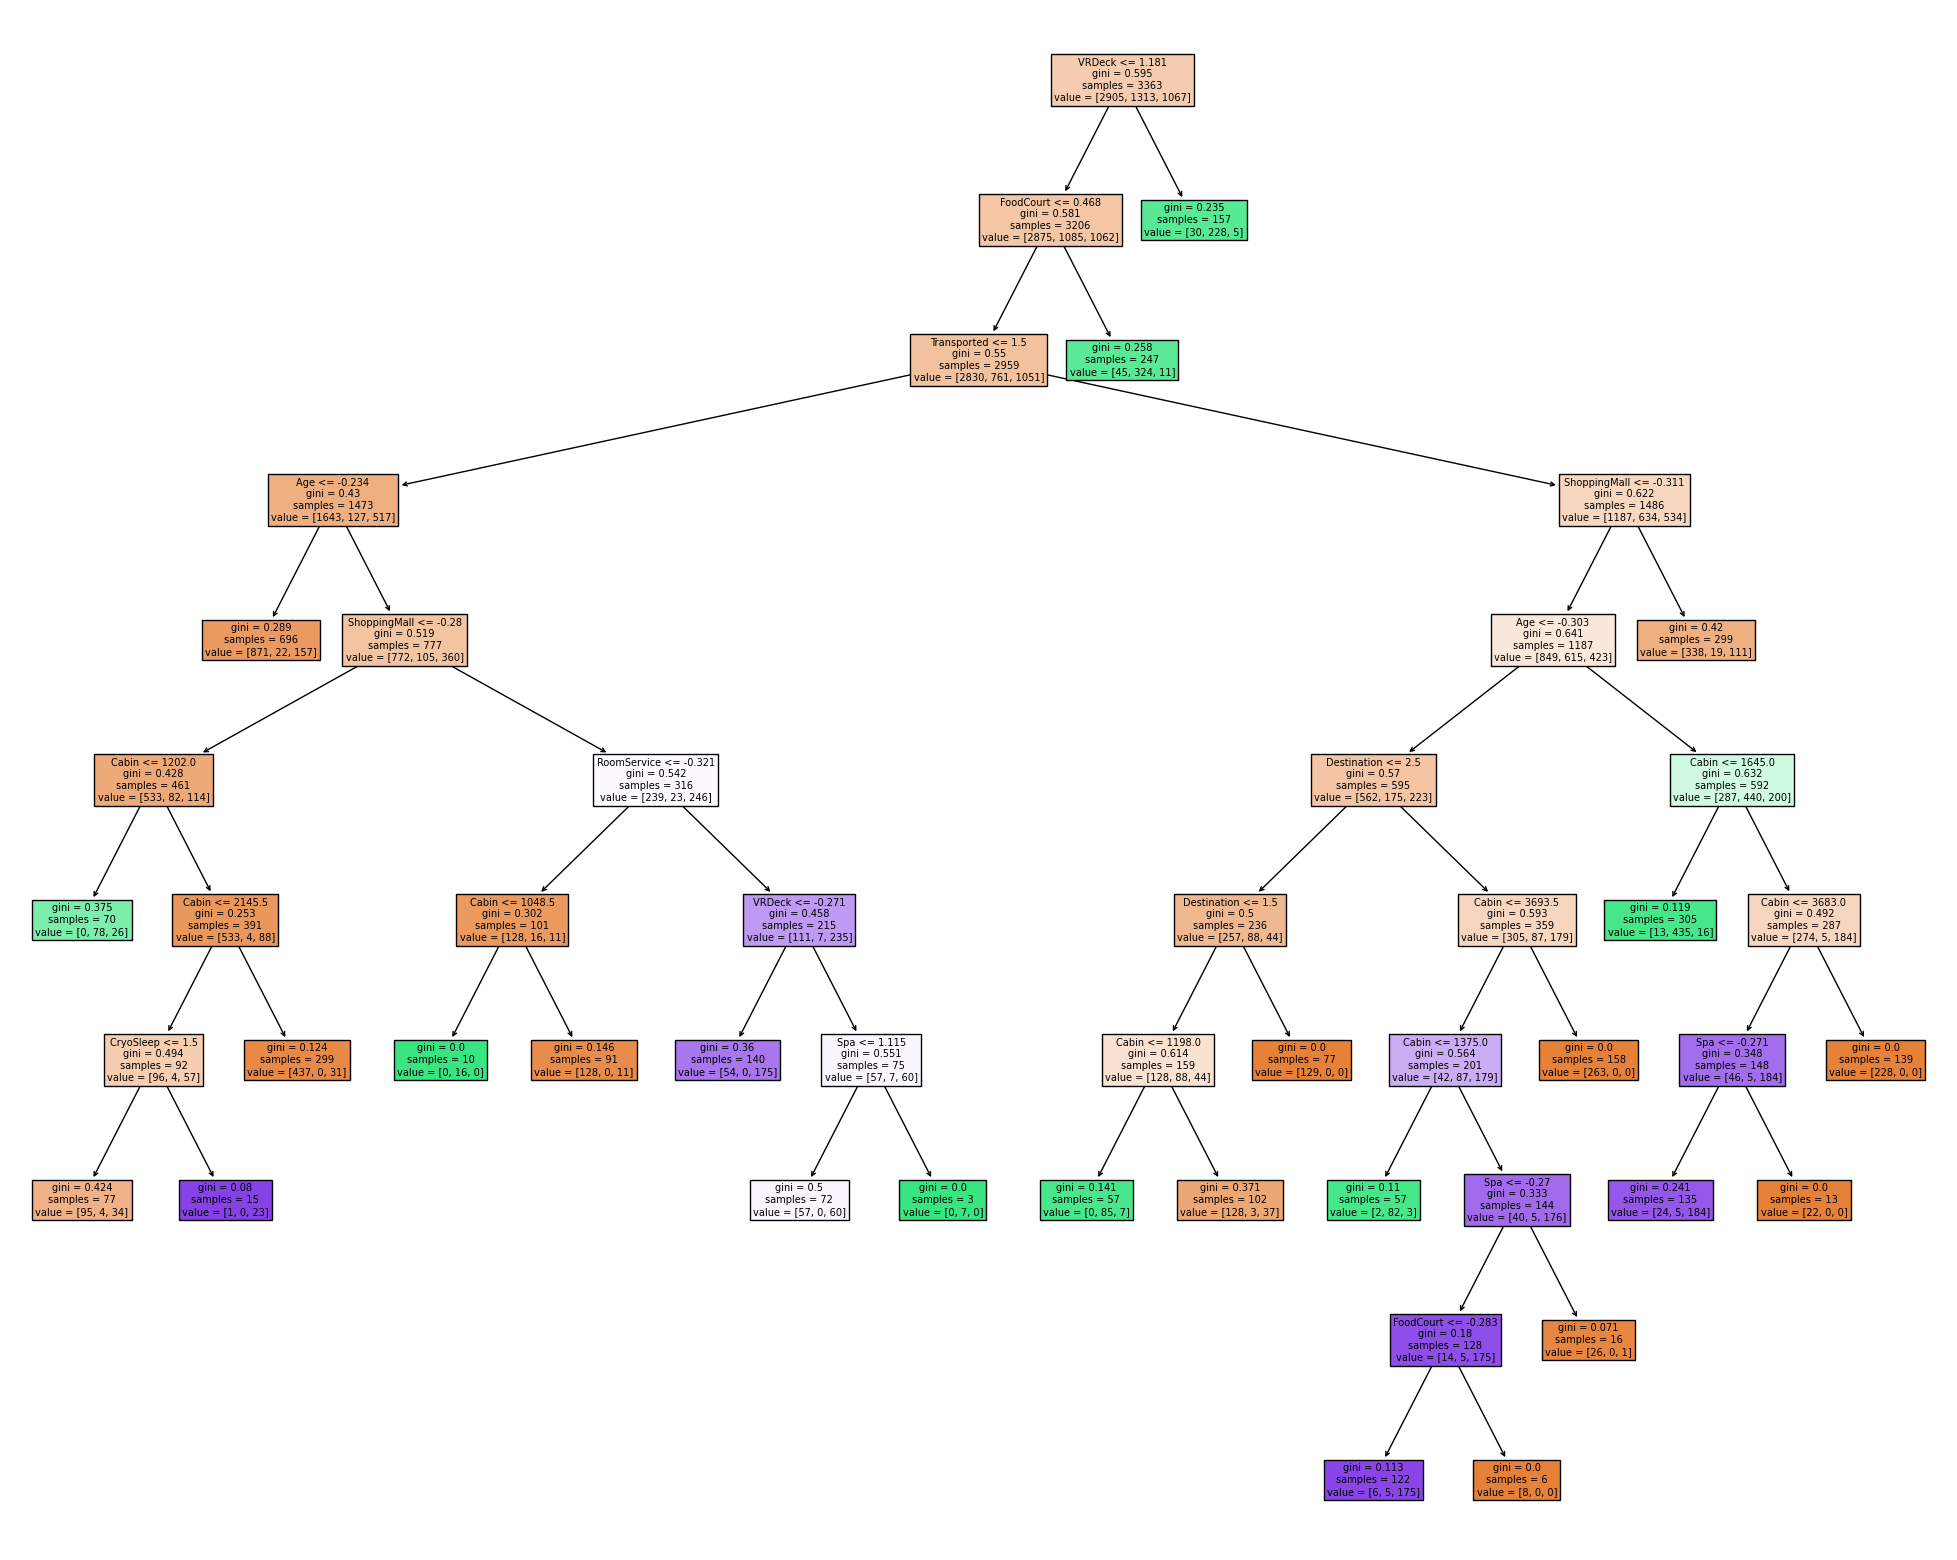

In [267]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(m[0],
                   feature_names= xs.columns,
                   filled=True)

In [257]:
(m.predict(xs[:30]) == y[:30]).sum()

27

In [251]:



def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

fi = rf_feat_importance(m, xs)
print(fi[:30])



            cols       imp
2          Cabin  0.591094
9      FoodCourt  0.087149
8    RoomService  0.071533
12        VRDeck  0.050646
7            Age  0.038256
10  ShoppingMall  0.035615
1      CryoSleep  0.032933
11           Spa  0.028779
6    Transported  0.024513
3    Destination  0.021666
5           Name  0.011712
4            VIP  0.005006
0    PassengerId  0.001098
